# Final Assignment
Python for Geospatial Analysis PhD Course @ AAU CPH, Spring 2020
Here is a Jupyter Notebook that performs the following steps:
1. Raster Analysis
2. Spatial Autocorrelation

## Raster Analysis 1

In [1]:
#Import necessary libraries
import os
import pandas as pd
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline 


Open the countries dataset and define path for projections' files

In [2]:
countries_tif = rasterio.open('countries.tif')
path = os.getcwd() + '/popdynamics'
#tif = rasterio.open('C:\\Users\\NM12LQ\\OneDrive - Aalborg Universitet\\PhDCourses\\3. Python\\Geospatial-Analysis-Notebooks_assignment\\popdynamics\\SSP4\\Total\\GeoTIFF\\ssp4_2020.tif')

### Countries dataset_ details
Print some information about the countries dataset 

In [3]:
print("The file is called", countries_tif.name)
print()
print("It is", countries_tif.width, "x",countries_tif.height,"pixels big")
print()
print("It covers the following extent:",countries_tif.bounds)
print()
print("It is in the following CRS:",countries_tif.crs)

The file is called countries.tif

It is 2880 x 1117 pixels big

It covers the following extent: BoundingBox(left=-180.0, bottom=-55.875, right=180.0, top=83.75)

It is in the following CRS: EPSG:4326


### Reading raster data
Access the raster band through its index and read the raster in a Numpy N-D array. Then plot a map 

In [4]:
{i: dtype for i, dtype in zip(countries_tif.indexes, countries_tif.dtypes)}

{1: 'float64'}

In [5]:
countries = countries_tif.read(1)
countries

array([[-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       ...,
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.],
       [-99., -99., -99., ..., -99., -99., -99.]])

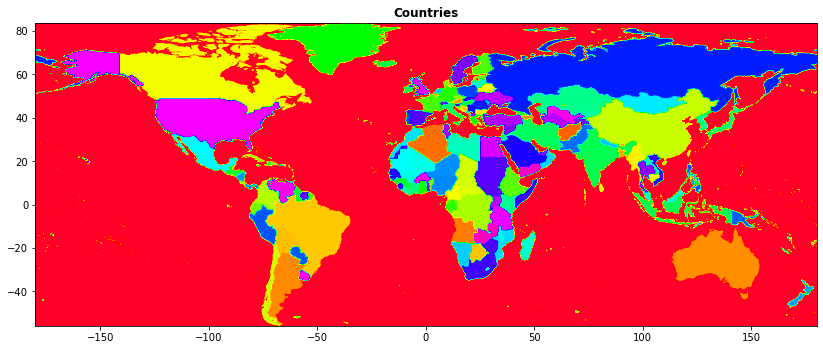

In [6]:
plt.figure(figsize=(14, 14))
show((countries_tif, 1), title='Countries', cmap='gist_rainbow')

How many countries are included?

In [7]:
countrylist= np.unique(countries).tolist()
num_countries=len(countrylist)-1 #-99= water
print('There are: {} countries'.format(num_countries) )

There are: 235 countries


Create lists a files for urban, rural and total population and years to be examined

In [8]:
rural = []
urban = []
total = []
Years = []

for subdir, dirs, files in os.walk(path):
    sorted_files = sorted(files)
    for file in sorted_files:

        if file.endswith(".tif"):
            name = file.split(".tif")[0]
            #print(name)
            if "rur" in file:
                nameRural = file.split(".tif")[0]
                directories_rural=os.path.join(subdir, file)
                rural.append(directories_rural)
                
            if "urb" in file:
                nameUrban = file.split(".tif")[0]
                directories_urban=os.path.join(subdir, file)
                urban.append(directories_urban)
                
            if "_" in file:
                nameTotal = file.split("_")[1]
                years = nameTotal.split(".tif")[0]        
                directories_total=os.path.join(subdir, file)
                total.append(directories_total)
                Years.append(years)
                Years.sort()

Write a function that plots the projected total and urban population from 2010 to 2100 for a selected country as a line chart. 

In [9]:
def plot_LineChart (country):
    UrbanPop = []
    TotalPop = []
    RuralPop = []
    for i in urban:
        tif_i=rasterio.open(i)
        pop_i = tif_i.read(1)
        urban_pop=np.sum(pop_i[country])
        UrbanPop.append(urban_pop)

    for x in total:
        tif_x=rasterio.open(x)
        pop_x = tif_x.read(1)
        total_pop=np.sum(pop_x[country])
        TotalPop.append(total_pop)

    for y in rural:
        tif_y=rasterio.open(y)
        pop_y = tif_y.read(1)
        rural_pop=np.sum(pop_y[country])
        RuralPop.append(rural_pop)
    
    # Data
    df=pd.DataFrame({'year': Years, 'total': TotalPop, 'urban': UrbanPop })

    # multiple line plot
    plt.plot( 'year', 'total', data=df, marker='', color='blue', linewidth=2, label="Total Population")
    plt.plot( 'year', 'urban', data=df, marker='', color='skyblue', linewidth=2, label="Urban Population")
    #plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="Rural Population" )
    plt.legend()

The <a href="https://en.wikipedia.org/wiki/ISO_3166-1_numeric" target="_blank">countries list</a> is saved in a csv file and used as dictionary to recall the country code from the country's name 

In [10]:
code_dic = pd.read_csv('codes.csv',encoding="latin-1", sep=';', index_col=0, squeeze=True, header=None).to_dict()
code_dic

{'country_name': 'code',
 'Afghanistan': '4',
 'Albania': '8',
 'Antarctica': '10',
 'Algeria': '12',
 'American Samoa': '16',
 'Andorra': '20',
 'Angola': '24',
 'Antigua and Barbuda': '28',
 'Azerbaijan': '31',
 'Argentina': '32',
 'Australia': '36',
 'Austria': '40',
 'Bahamas': '44',
 'Bahrain': '48',
 'Bangladesh': '50',
 'Armenia': '51',
 'Barbados': '52',
 'Belgium': '56',
 'Bermuda': '60',
 'Bhutan': '64',
 'Bolivia (Plurinational State of)': '68',
 'Bosnia and Herzegovina': '70',
 'Botswana': '72',
 'Bouvet Island': '74',
 'Brazil': '76',
 'Belize': '84',
 'British Indian Ocean Territory': '86',
 'Solomon Islands': '90',
 'Virgin Islands (British)': '92',
 'Brunei Darussalam': '96',
 'Bulgaria': '100',
 'Myanmar': '104',
 'Burundi': '108',
 'Belarus': '112',
 'Cambodia': '116',
 'Cameroon': '120',
 'Canada': '124',
 'Cabo Verde': '132',
 'Cayman Islands': '136',
 'Central African Republic': '140',
 'Sri Lanka': '144',
 'Chad': '148',
 'Chile': '152',
 'China': '156',
 'Taiwan_

Select a country to plot the line chart and call the function 

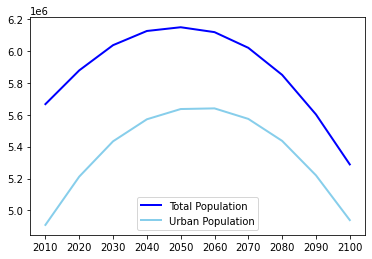

In [11]:
for country, value in code_dic.items():
    if country  == 'Denmark':  #select here a country
        code_dic[country] = value
        code = pd.to_numeric(value)
        sel_country = countries == code
        #print(code)  

plot_LineChart (sel_country)


In [12]:
#some countries show negative population sum and billions... what's wrong? 
france_2010 = rasterio.open('france_ssp2010.tif')
france_pop2010 = france_2010.read(1)
popFrance=np.sum(france_pop2010)
popFrance

-2086971195

## Raster Analysis 2 
Even though in most of the countries the population seems to increase until 2050, in the 2nd half of the centure the population declines. In other words, a lower number of residents will inhabite in most areas in 2100 compared to 2010. This part considers only the first and the last estimations regardless the intermediate flactuations and a global raster is generated showing only the cells that are projected to lose population and indicates how much the population in those cells is projected to decline between 2010 and 2100.  

In [123]:
#open the datasets
ssp4_2100 = rasterio.open('popdynamics/SSP4/Total/GeoTIFF/ssp4_2100.tif')
ssp4_2010 = rasterio.open('popdynamics/SSP4/Total/GeoTIFF/ssp4_2010.tif')


In [124]:
#read the datasets
pop2100 = ssp4_2100.read(1)
pop2010 = ssp4_2010.read(1)

The dataset of the difference between starting and ending year is calculated here. 

In [125]:
diff = pop2010 - pop2100
diff.shape

(1117, 2880)

The cells that lose population are shown in the following plot. 
The cells with positive values lose population. 
The population increases in the cells where the values are negative. 

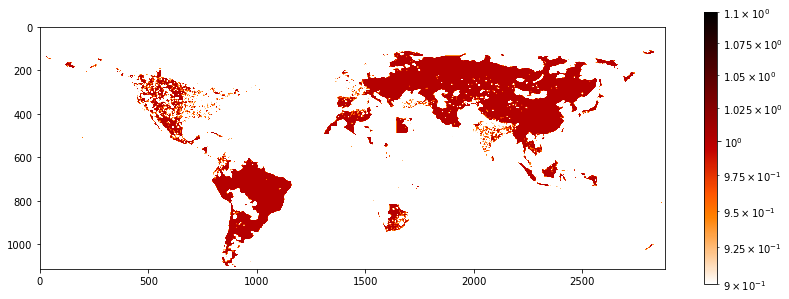

In [127]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(14, 5))

imgplot = plt.imshow(diff>0, norm=LogNorm(), cmap='gist_heat_r')
plt.colorbar()

The raster is generated after compression

In [128]:
def compress(inputfile, outputfile, layer, compression, datatype):
    
    with rasterio.Env():

        # Write an array as a raster band to a new 8-bit file. For
        # the new file's profile, we start with the profile of the source
        profile = inputfile.profile

        # And then change the band count to 1, set the
        # dtype to uint8, and specify LZW compression.
        profile.update(
            dtype=datatype,
            count=1,
            compress=compression)

        with rasterio.open(outputfile, 'w', **profile) as dst:
            dst.write(layer.astype(datatype),1)

Set all the negative values to 0, compress and save the raster in geotiff format

In [131]:
diff[diff < 0] = 0
diff.shape

(1117, 2880)

In [132]:
#compress and save the geotiff
compress(ssp4_2100, 'pop-difference-lzw.tif', diff, 'lzw', rasterio.float32)

## Spatial autocorrelation 1

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import pysal as ps
import libpysal 
from libpysal import weights
from pysal.explore import esda
from pysal.viz import mapclassify


In [2]:
# Read the file of the countries 
fp = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp" 

data = gpd.read_file(fp) 
len(data.columns)

95

In [3]:
#read the file of child mortality
mortality= pd.read_csv('under5mortality.csv')
mortality.head

<bound method NDFrame.head of      Unnamed: 0  ISO                                  Name  ChildMortality
0             1  AFG                           Afghanistan            67.9
1             4  ALB                               Albania             8.8
2             7  DZA                               Algeria            24.0
3            10  AND                               Andorra             3.3
4            13  AGO                                Angola            81.1
..          ...  ...                                   ...             ...
191         574  VEN  Venezuela (Bolivarian Republic of)**            30.9
192         577  VNM                              Viet Nam            20.9
193         580  YEM                                 Yemen            55.4
194         583  ZMB                                Zambia            60.0
195         586  ZWE                              Zimbabwe            50.3

[196 rows x 4 columns]>

Join the two datasets 

In [4]:
join= pd.merge(data, mortality, left_on='ISO_A3', right_on='ISO', how='left')
len(join)

177

Exclude the missing values from the dataframe where column=ChildMortality. Take only the rows that have values for childMortality

In [5]:
join_df = join[join['ChildMortality'].notna()]
join_df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,ISO,Name,ChildMortality
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",181.0,FJI,Fiji,25.3
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",559.0,TZA,United Republic of Tanzania,54.0
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",97.0,CAN,Canada,5.1
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",562.0,USA,United States,6.6
5,Admin-0 country,1,3,Kazakhstan,KAZ,0,2,Sovereign country,Kazakhstan,KAZ,...,Казахстан,Kazakstan,Kazakistan,Kazakhstan,哈萨克斯坦,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",265.0,KAZ,Kazakhstan,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Admin-0 country,1,6,Macedonia,MKD,0,2,Sovereign country,Macedonia,MKD,...,Республика Македония,Makedonien,Makedonya Cumhuriyeti,Cộng hòa Macedonia,馬其頓共和國,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",520.0,MKD,The former Yugoslav Republic of Macedonia,13.7
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",460.0,SRB,Serbia,5.7
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",346.0,MNE,Montenegro,3.5
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",532.0,TTO,Trinidad and Tobago,26.1


## Examination of the dataset, classification and map plotting 
Find the maximum, minimum and mean values of child mortality in the dataset without the missing values

In [6]:
# Maximum area 
max = join_df['ChildMortality'].max() 
# Minimum area 
min = join_df['ChildMortality'].min() 
# Mean area 
mean = join_df['ChildMortality'].mean()

print(min,max,mean)

2.1 127.2 31.190243902439022


In [143]:
classi = mapclassify.EqualInterval(join_df['ChildMortality'], k=7)
classi

EqualInterval           

    Interval       Count
------------------------
[  2.10,  19.97] |    84
( 19.97,  37.84] |    28
( 37.84,  55.71] |    20
( 55.71,  73.59] |    11
( 73.59,  91.46] |    13
( 91.46, 109.33] |     4
(109.33, 127.20] |     4

In [144]:
classi.bins

array([ 19.97142857,  37.84285714,  55.71428571,  73.58571429,
        91.45714286, 109.32857143, 127.2       ])

In [145]:
def plotClassification(classi):
    # Set up the figure
    f, ax = plt.subplots(1, figsize=(9, 6))
    # Plot the kernel density estimation (KDE)
    sns.kdeplot(join_df['ChildMortality'], shade=True)
    # Add a blue tick for every value at the bottom of the plot (rugs)
    sns.rugplot(join_df['ChildMortality'], alpha=0.5)
    # Loop over each break point and plot a vertical red line
    for cut in classi.bins:
        plt.axvline(cut, color='red', linewidth=0.75)
    # Title
    ax.set_title(classi.name)
    # Display image
    plt.show()

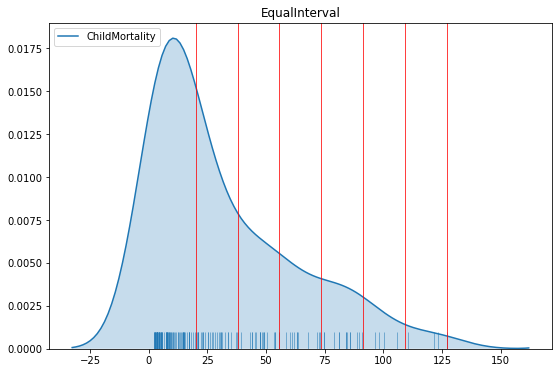

In [146]:
plotClassification(classi)

In [147]:
classi = mapclassify.FisherJenks(join_df['ChildMortality'], k=7)
classi

FisherJenks             

    Interval       Count
------------------------
[  2.10,  11.30] |    61
( 11.30,  24.00] |    33
( 24.00,  39.40] |    20
( 39.40,  55.40] |    18
( 55.40,  74.90] |    13
( 74.90, 100.20] |    14
(100.20, 127.20] |     5

In [148]:
classi = mapclassify.BoxPlot(join_df['ChildMortality'])
classi

BoxPlot                 

    Interval       Count
------------------------
(  -inf, -53.87] |     0
(-53.87,   7.47] |    41
(  7.47,  18.60] |    41
( 18.60,  48.37] |    41
( 48.37, 109.72] |    37
(109.72, 127.20] |     4

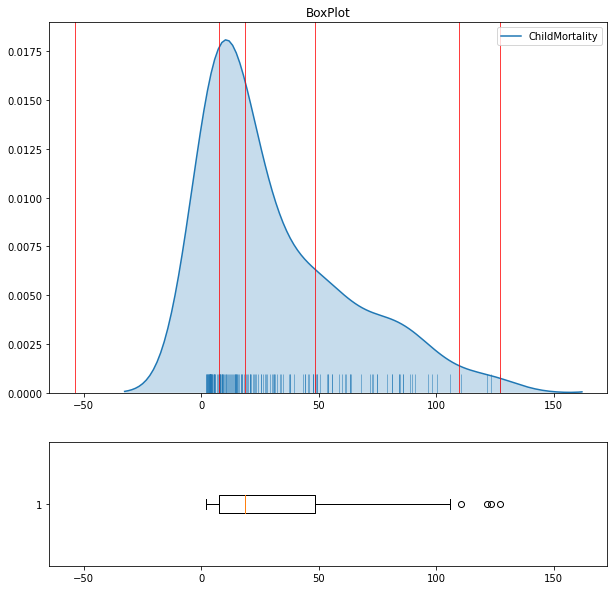

In [149]:
# Set up the figure
f, axs = plt.subplots(2, figsize=(10, 10), gridspec_kw = {'height_ratios':[3, 1]})
# Plot the kernel density estimation (KDE)
sns.kdeplot(join_df['ChildMortality'], shade=True, ax=axs[0])
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(join_df['ChildMortality'], alpha=0.5, ax=axs[0])
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    axs[0].axvline(cut, color='red', linewidth=0.75)
# Box-Plot
axs[1].boxplot(join_df['ChildMortality'], vert=False)
# Set X axis manually
axs[1].set_xlim(axs[0].get_xlim())
# Title
axs[0].set_title(classi.name)
# Display image
plt.show()

C:\Users\NM12LQ\Anaconda3\envs\geoanalysis-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  after removing the cwd from sys.path.


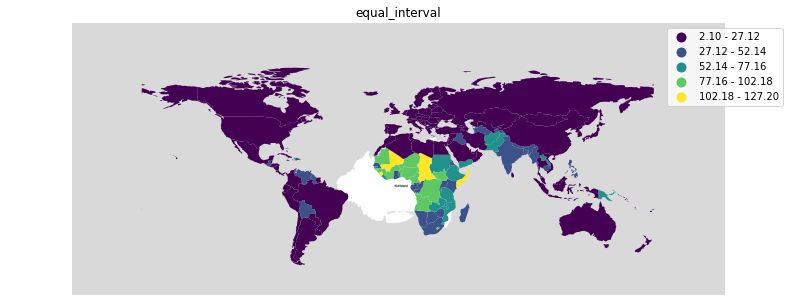

C:\Users\NM12LQ\Anaconda3\envs\geoanalysis-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  after removing the cwd from sys.path.


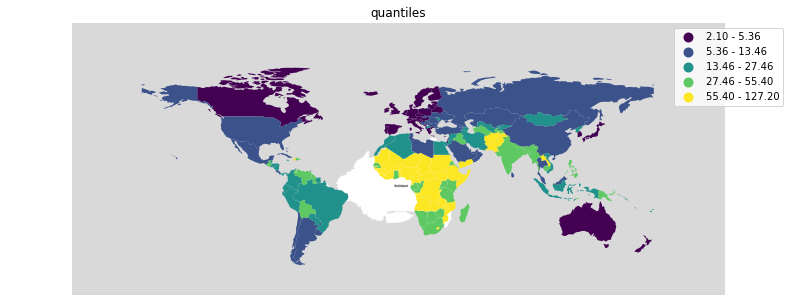

C:\Users\NM12LQ\Anaconda3\envs\geoanalysis-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  after removing the cwd from sys.path.


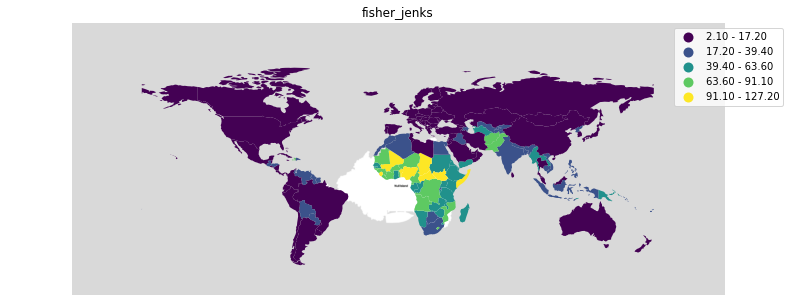

In [150]:
for classification in ['equal_interval', 'quantiles', 'fisher_jenks']:
    f, ax = plt.subplots(1, figsize=(14, 5))
    join_df.plot(column='ChildMortality', scheme=classification, ax=ax, legend=True)
    ctx.add_basemap(ax, source=ctx.sources.ST_TONER_LITE)
    ax.set_axis_off()
    plt.axis('equal')
    plt.title(classification)
    plt.show()

## Spatial Autocorrelation 2
Queen Contiguity Weights : adjacency relationships as a binary indicator variable denoting whether or not a polygon shares an edge or a vertex with another polygon. (source:http://darribas.org/gds_scipy16/ipynb_md/03_spatial_weights.html)

Calculate the Queen Contiguity Weight. Get the neighbors & weights around an observation. The neighbors may share an edge and/or vertice(s) 

In [7]:
w_queen = weights.Queen.from_dataframe(join_df)
w_queen[10]

C:\Users\NM12LQ\Anaconda3\envs\geoanalysis-env\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 20 disconnected components.
 There are 15 islands with ids: 0, 18, 39, 40, 71, 82, 127, 128, 129, 130, 135, 138, 146, 150, 162.
  warnings.warn(message)


{1: 1.0,
 67: 1.0,
 68: 1.0,
 163: 1.0,
 156: 1.0,
 59: 1.0,
 60: 1.0,
 157: 1.0,
 63: 1.0}

View the observation and its neighbors in the dataframe by putting the observation's index and its neighbors' indexes together in one list

In [8]:
self_and_neighbors = [10]
self_and_neighbors.extend(w_queen.neighbors[10])
print(self_and_neighbors)

[10, 1, 67, 68, 163, 156, 59, 60, 157, 63]


And grab those elements from the dataframe

In [9]:
join_df.loc[self_and_neighbors]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,Unnamed: 0,ISO,Name,ChildMortality
10,Admin-0 country,1,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",106.0,CHL,Chile,7.4
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",559.0,TZA,United Republic of Tanzania,54.0
67,Admin-0 country,1,4,Republic of the Congo,COG,0,2,Sovereign country,Republic of the Congo,COG,...,Республика Конго,Kongo-Brazzaville,Kongo Cumhuriyeti,Cộng hòa Congo,刚果共和国,"POLYGON ((18.45307 3.50439, 18.39379 2.90044, ...",118.0,COG,Congo,47.5
68,Admin-0 country,1,4,Gabon,GAB,0,2,Sovereign country,Gabon,GAB,...,Габон,Gabon,Gabon,Gabon,加蓬,"POLYGON ((11.27645 2.26105, 11.75167 2.32676, ...",190.0,GAB,Gabon,48.3
163,Admin-0 country,1,2,Egypt,EGY,0,2,Sovereign country,Egypt,EGY,...,Египет,Egypten,Mısır,Ai Cập,埃及,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",160.0,EGY,Egypt,22.1
156,Admin-0 country,1,4,Paraguay,PRY,0,2,Sovereign country,Paraguay,PRY,...,Парагвай,Paraguay,Paraguay,Paraguay,巴拉圭,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",403.0,PRY,Paraguay,21.0
59,Admin-0 country,1,3,Ghana,GHA,0,2,Sovereign country,Ghana,GHA,...,Гана,Ghana,Gana,Ghana,迦納,"POLYGON ((0.02380 11.01868, -0.04978 10.70692,...",202.0,GHA,Ghana,49.3
60,Admin-0 country,1,3,Ivory Coast,CIV,0,2,Sovereign country,Ivory Coast,CIV,...,Кот-д’Ивуар,Elfenbenskusten,Fildişi Sahili,Bờ Biển Ngà,科特迪瓦,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",85.0,CIV,Cote d'Ivoire,88.8
157,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,Йемен,Jemen,Yemen,Yemen,也门,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",580.0,YEM,Yemen,55.4
63,Admin-0 country,1,4,Liberia,LBR,0,2,Sovereign country,Liberia,LBR,...,Либерия,Liberia,Liberya,Liberia,利比里亚,"POLYGON ((-8.43930 7.68604, -8.48545 7.39521, ...",292.0,LBR,Liberia,74.7


A full, dense matrix describing all of the pairwise relationships is constructed using the .full method. It is a binary matrix with elements either 0 or 1 for neighbors or not neighbors.

In [14]:
matrix  = pd.DataFrame(w_queen.full()[0], 
                 index=join_df['ChildMortality'],
                 columns=join_df['ChildMortality'],
                ).astype(float)
matrix

ChildMortality,25.3,54.0,5.1,6.6,10.0,22.5,53.4,25.4,10.4,7.4,...,58.5,61.7,49.0,37.9,5.7,13.7,5.7,3.5,26.1,96.4
ChildMortality,,,,,,,,,,,,,,,,,,,,,
25.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [15]:
moran = esda.Moran(join_df['ChildMortality'], w_queen)
moran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 18, ' is an island (no neighbors)')
('WARNING: ', 39, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')
('WARNING: ', 71, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 127, ' is an island (no neighbors)')
('WARNING: ', 128, ' is an island (no neighbors)')
('WARNING: ', 129, ' is an island (no neighbors)')
('WARNING: ', 130, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 146, ' is an island (no neighbors)')
('WARNING: ', 150, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')


0.7391687656288461

Moran's I measures spatial autocorrelation based on both the location and the values of a feature at the same time. So, tt seems that there is a relatively high positive spatial correlation for child mortality among the countries.   

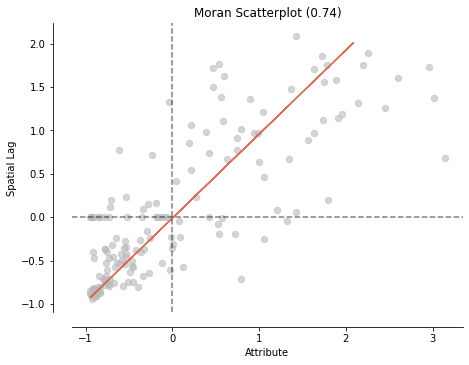

In [17]:
moran.p_sim

from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()